# Tasca M9 T01

##### Importing libraries

In [ ]:
# importing libraries

import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords                            
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

!pip install wikipedia
import wikipedia
import re #Clean text from wiki

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Exercici 1
### Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

Escogemos una entrada de la wikipedia en este caso en concreto la entrada sobre el huracán Julia que nos encontramos en la portada de la wikipedia.

En primer lugar nos descargaremos el texto y lo guardaremos en una variable para poder seguir utlizandolo el resto del ejercicio.

In [ ]:
# Specify the title of the Wikipedia page
wiki = wikipedia.page('Hurricane Julia (2022)', auto_suggest=False)

# Extract the plain text content of the page
text = wiki.content
text

"Hurricane Julia was a deadly tropical cyclone that caused significant impacts in Central America as a Category 1 hurricane in October 2022. The tenth named storm and fifth hurricane of the 2022 Atlantic hurricane season, Julia originated from a tropical wave in the tropical North Atlantic Ocean, and became a named storm on October 7. It took a southerly course through the Caribbean and passed just off the coast of Venezuela at the time it became a tropical cyclone. Only one storm on record, Tropical Storm Bret in 1993, has tracked further south over South America.On October 8, it became a hurricane and proceeded to make landfall in Nicaragua. It emerged into the Pacific Ocean as a tropical storm on October 10, becoming the eighteenth tropical storm of the 2022 Pacific hurricane season, and the second storm of the season to survive the crossover between the Atlantic–Pacific basin, after Bonnie in July. The storm then briefly moved along the coast of El Salvador, before moving inland an

El texto extraido viene con algunos simbolos que no nos interesan. Lo limpiaremos para optener el texto más plano y significativo posible.


◼ Drop headers surrounded by ‘==’: re.sub(r'==.*?==+', '', text)

◼ Replace ‘\n’ (a new line) with ‘’ (an empty string): .replace('\n', '')

In [ ]:
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
text

"Hurricane Julia was a deadly tropical cyclone that caused significant impacts in Central America as a Category 1 hurricane in October 2022. The tenth named storm and fifth hurricane of the 2022 Atlantic hurricane season, Julia originated from a tropical wave in the tropical North Atlantic Ocean, and became a named storm on October 7. It took a southerly course through the Caribbean and passed just off the coast of Venezuela at the time it became a tropical cyclone. Only one storm on record, Tropical Storm Bret in 1993, has tracked further south over South America.On October 8, it became a hurricane and proceeded to make landfall in Nicaragua. It emerged into the Pacific Ocean as a tropical storm on October 10, becoming the eighteenth tropical storm of the 2022 Pacific hurricane season, and the second storm of the season to survive the crossover between the Atlantic–Pacific basin, after Bonnie in July. The storm then briefly moved along the coast of El Salvador, before moving inland an

Para simplificar el posterior análisis:

* Pasamos todas las palabras del texto a minúsculas . 
* Descompondremos el texto en palabras dentro de una lista. "Tokenizar"

In [ ]:
text = text.lower()
tokenized_word=word_tokenize(text)

tokenized_word = [w for w in tokenized_word if w.isalpha()]

print(tokenized_word)

['hurricane', 'julia', 'was', 'a', 'deadly', 'tropical', 'cyclone', 'that', 'caused', 'significant', 'impacts', 'in', 'central', 'america', 'as', 'a', 'category', 'hurricane', 'in', 'october', 'the', 'tenth', 'named', 'storm', 'and', 'fifth', 'hurricane', 'of', 'the', 'atlantic', 'hurricane', 'season', 'julia', 'originated', 'from', 'a', 'tropical', 'wave', 'in', 'the', 'tropical', 'north', 'atlantic', 'ocean', 'and', 'became', 'a', 'named', 'storm', 'on', 'october', 'it', 'took', 'a', 'southerly', 'course', 'through', 'the', 'caribbean', 'and', 'passed', 'just', 'off', 'the', 'coast', 'of', 'venezuela', 'at', 'the', 'time', 'it', 'became', 'a', 'tropical', 'cyclone', 'only', 'one', 'storm', 'on', 'record', 'tropical', 'storm', 'bret', 'in', 'has', 'tracked', 'further', 'south', 'over', 'south', 'october', 'it', 'became', 'a', 'hurricane', 'and', 'proceeded', 'to', 'make', 'landfall', 'in', 'nicaragua', 'it', 'emerged', 'into', 'the', 'pacific', 'ocean', 'as', 'a', 'tropical', 'storm',

El texto se compone de 1119 palabras de las cuales 407 son únicas.

In [ ]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 407 samples and 1119 outcomes>


Veamos como se distribuyen las primeras 15 palabras mas repetidas.

In [ ]:
word_df = pd.DataFrame(fdist.most_common(15))
word_df.columns = ['Common_words','count']
word_df.style.background_gradient(cmap='YlOrRd')

,Common_words,count
0,the,72
1,of,50
2,and,40
3,a,38
4,in,27
5,october,20
6,hurricane,19
7,storm,19
8,tropical,18
9,to,18


In [ ]:
fig = px.bar(word_df, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='count')
fig.show()

## Exercici 2
###  Treu les stopwords i realitza stemming al teu conjunt de dades.



Aplicando Stopwords eliminaremos aquellas palabras que no le aportan significado real al texto. Ejemplos de stop words son: is, am, are, this, a, an, the, etc.

In [ ]:
stop_words = set(stopwords.words("english"))
print(stop_words)


{'you', 'has', 'we', 'here', 'if', 've', 'how', 'theirs', 'mightn', 'both', 'didn', 'she', 'before', 'was', 'him', 'more', 'been', 'nor', 'hers', "you'd", 'that', 'yourself', 'the', 'as', 'are', "aren't", 'ours', 'shan', 'shouldn', 'wasn', 'against', 'only', 'off', "wasn't", 'by', "doesn't", "should've", "that'll", "haven't", 'below', 'he', 'not', 'into', "wouldn't", 'her', 'do', 'will', "needn't", 'above', 't', "didn't", 'can', 'hadn', "shan't", 'while', 'who', 'yours', 'most', "hadn't", 'my', 'did', 'wouldn', 'it', 'should', 'a', 'so', 'i', "you'll", "isn't", 'during', 'from', 'ourselves', "you've", 'under', 'then', 'ma', 'for', 'same', 'over', 'any', 'why', 'to', 'those', "weren't", 'they', 'again', 'y', 'but', 'won', 'up', 'in', 'than', 'until', 'and', 'no', 'just', 'where', 'whom', 'after', "shouldn't", "mustn't", 'through', 'be', 're', 'an', 'very', 'weren', 'aren', 'when', 'hasn', 'were', 'out', 'once', 'all', 'few', 'doesn', "you're", 'some', 'o', 'now', 'had', 'their', 'other'

In [ ]:
filtered_word = [w for w in tokenized_word if w not in stop_words]

print("Tokenized Words:",tokenized_word)
print("Filterd Words:",filtered_word)

Tokenized Words: ['hurricane', 'julia', 'was', 'a', 'deadly', 'tropical', 'cyclone', 'that', 'caused', 'significant', 'impacts', 'in', 'central', 'america', 'as', 'a', 'category', 'hurricane', 'in', 'october', 'the', 'tenth', 'named', 'storm', 'and', 'fifth', 'hurricane', 'of', 'the', 'atlantic', 'hurricane', 'season', 'julia', 'originated', 'from', 'a', 'tropical', 'wave', 'in', 'the', 'tropical', 'north', 'atlantic', 'ocean', 'and', 'became', 'a', 'named', 'storm', 'on', 'october', 'it', 'took', 'a', 'southerly', 'course', 'through', 'the', 'caribbean', 'and', 'passed', 'just', 'off', 'the', 'coast', 'of', 'venezuela', 'at', 'the', 'time', 'it', 'became', 'a', 'tropical', 'cyclone', 'only', 'one', 'storm', 'on', 'record', 'tropical', 'storm', 'bret', 'in', 'has', 'tracked', 'further', 'south', 'over', 'south', 'october', 'it', 'became', 'a', 'hurricane', 'and', 'proceeded', 'to', 'make', 'landfall', 'in', 'nicaragua', 'it', 'emerged', 'into', 'the', 'pacific', 'ocean', 'as', 'a', 'tr

Haremos Stemming al texto, un proceso de normalización lingüística que reduce las palabras a su raíz o elimina los afijos derivativos. Por ejemplo, connection, connected, connecting se reducen a la palabra común "connect".

In [ ]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Words:",filtered_word)
print("Stemmed Words:",stemmed_words)

Filtered Words: ['hurricane', 'julia', 'deadly', 'tropical', 'cyclone', 'caused', 'significant', 'impacts', 'central', 'america', 'category', 'hurricane', 'october', 'tenth', 'named', 'storm', 'fifth', 'hurricane', 'atlantic', 'hurricane', 'season', 'julia', 'originated', 'tropical', 'wave', 'tropical', 'north', 'atlantic', 'ocean', 'became', 'named', 'storm', 'october', 'took', 'southerly', 'course', 'caribbean', 'passed', 'coast', 'venezuela', 'time', 'became', 'tropical', 'cyclone', 'one', 'storm', 'record', 'tropical', 'storm', 'bret', 'tracked', 'south', 'south', 'october', 'became', 'hurricane', 'proceeded', 'make', 'landfall', 'nicaragua', 'emerged', 'pacific', 'ocean', 'tropical', 'storm', 'october', 'becoming', 'eighteenth', 'tropical', 'storm', 'pacific', 'hurricane', 'season', 'second', 'storm', 'season', 'survive', 'crossover', 'basin', 'bonnie', 'july', 'storm', 'briefly', 'moved', 'along', 'coast', 'el', 'salvador', 'moving', 'inland', 'degenerating', 'remnant', 'low', 'g

Tras aplicar stopwords y stemming nos encontramos con que tenemos 695 palabras, poco mas de la mitad de las que tenia el texto incial, 1119. De estas 695, 320 son únicas. 

In [ ]:
print(FreqDist(tokenized_word))
print(FreqDist(stemmed_words))

<FreqDist with 407 samples and 1119 outcomes>
<FreqDist with 320 samples and 695 outcomes>


Veamos la nueva distribución gráficamente en comparación con texto original.

Palabras importantes como storm y hurrican se han ido al top 2 y 3 en sustitución de otras como the of and que no aportan valor al analisis.

In [ ]:
word_df = pd.DataFrame(fdist.most_common(25))
word_df.columns = ['Common_words','count]
fig = px.treemap(word_df, path=['Common_words'], values='count',title='Tree of Most Common Words TEXTO ORIGINAL',
                 width=1200, height=400)
fig.show()


fdist_stopwords_stemming = FreqDist(stemmed_words)
word_stopwords_stemming_df = pd.DataFrame(fdist_stopwords_stemming.most_common(25))
word_stopwords_stemming_df.columns = ['Common_words','count']

fig = px.treemap(word_stopwords_stemming_df, path=['Common_words'], values='count',title='Tree of Most Common Words después de quitar stopwords y realizar stemming', 
                 width=1200, height=400)
fig.show()

## Exercici 3
### Realitza sentiment analysis al teu conjunt de dades.

SentimentAnalyzer es una herramienta para implementar y facilitar las tareas de Análisis de Sentimientos de texto utilizando características y clasificadores de NLTK.

Overall sentiment dictionary is :  {'neg': 0.113, 'neu': 0.847, 'pos': 0.04, 'compound': -0.9954}
sentence was rated as  11.3 % Negative
sentence was rated as  84.7 % Neutral
sentence was rated as  4.0 % Positive 

El texto es Negativo




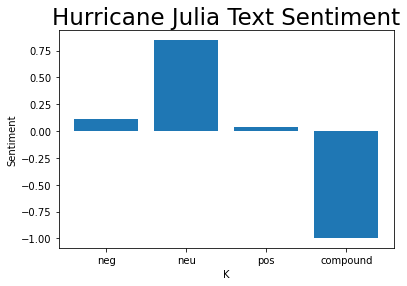

In [ ]:
sid = SentimentIntensityAnalyzer()
stemmed_words_to_sentiment = ' '.join(stemmed_words)
sentiment = sid.polarity_scores(stemmed_words_to_sentiment)

print("Overall sentiment dictionary is : ", sentiment)
print("sentence was rated as ", sentiment['neg']*100, "% Negative")
print("sentence was rated as ", sentiment['neu']*100, "% Neutral")
print("sentence was rated as ", sentiment['pos']*100, "% Positive \n")

    # decide sentiment as positive, negative and neutral
if sentiment['compound'] >= 0.05 :
        print("El texto es Positivo")
 
elif sentiment['compound'] <= - 0.05 :
        print("El texto es Negativo")
 
else :
        print("El texto es Neutral")

print("\n")

plt.bar(range(len(sentiment)), list(sentiment.values()), align='center')
plt.xticks(range(len(D)), list(sentiment.keys()))
plt.title('Hurricane Julia Text Sentiment', fontsize = 23)
plt.xlabel('K') 
plt.ylabel('Sentiment') 
plt.show()

El texto habla del huracán Julia fue un ciclón tropical mortal que causó importantes impactos en Centroamérica.

En el texto nos encontramos, como cabia de esperar, un porcentaje más elevado de palabras negativas que positivas. 

Nuestro modelo, SentimentIntensityAnalyzer, valora el texto como **NEGATIVO**